In [128]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [129]:
df = pd.read_csv("forestfires.csv")

df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

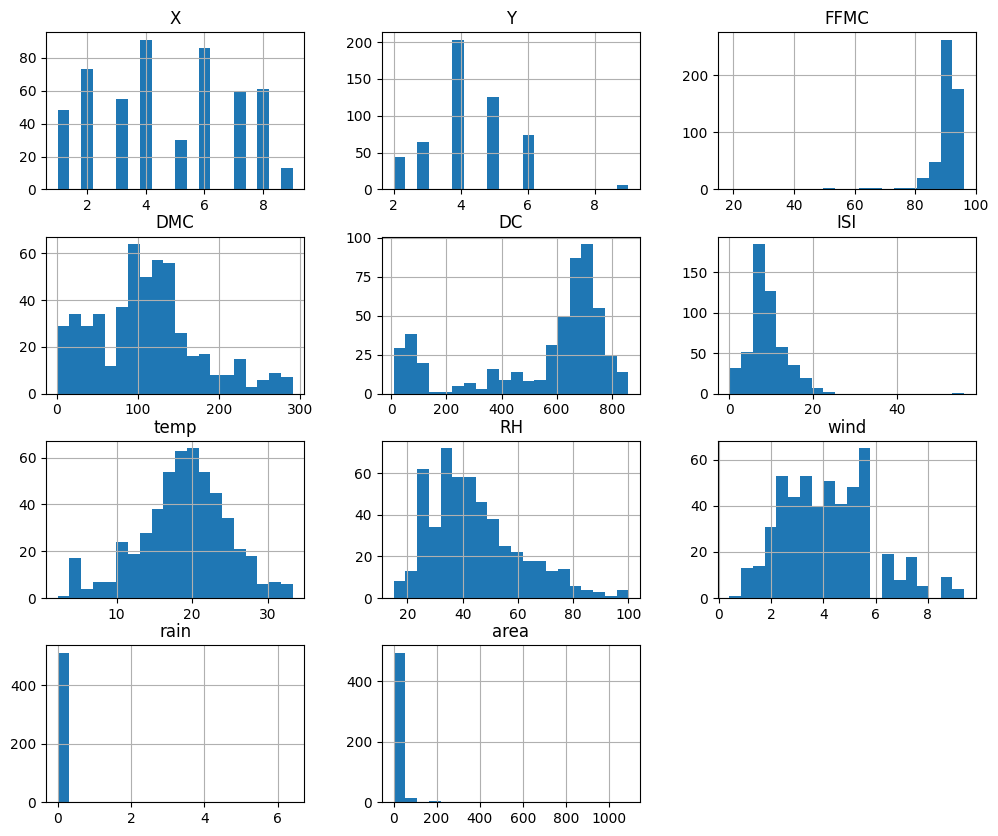

In [130]:
df.hist(figsize=(12,10), bins=20)

In [131]:
import math
import numpy as np

In [132]:
df = df.drop(columns=['rain'])

In [133]:
df_log = df
df_log['area'] = df_log['area'].apply(lambda x: math.log(x+1))

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'area'}>, <Axes: >, <Axes: >]],
      dtype=object)

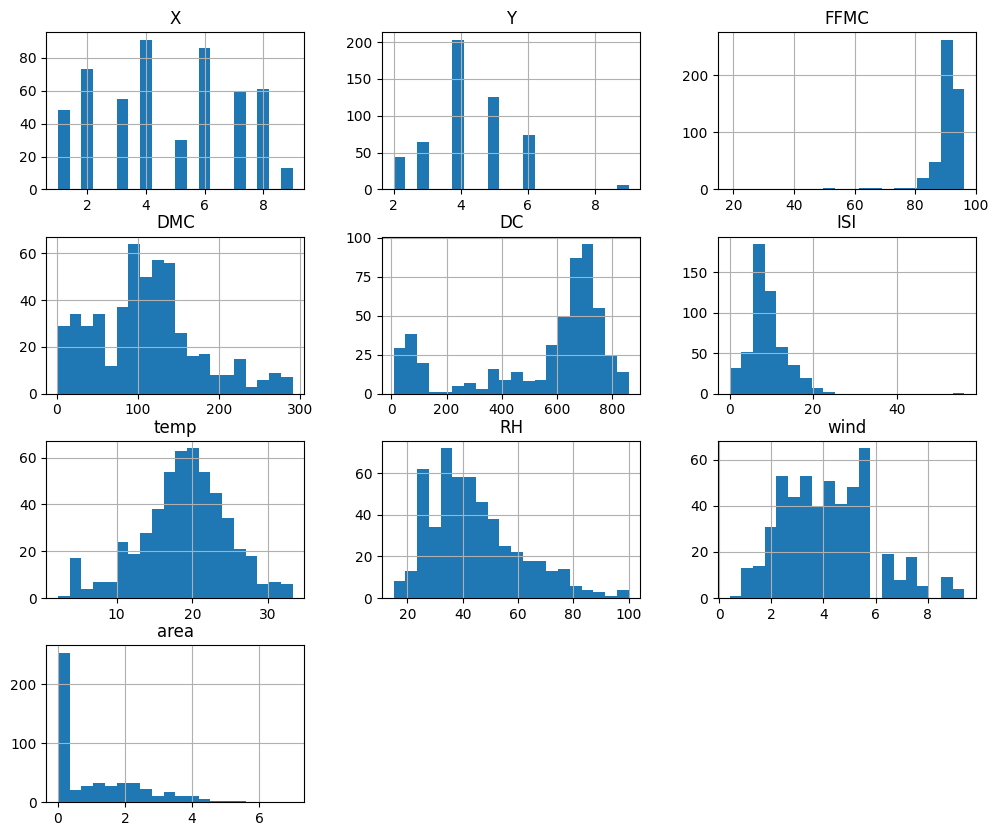

In [134]:
df_log.hist(figsize=(12,10), bins=20)

In [135]:
df_sqrt = df
df_sqrt['area'] = df_sqrt['area'].apply(lambda x: math.sqrt(x+1))

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'area'}>, <Axes: >, <Axes: >]],
      dtype=object)

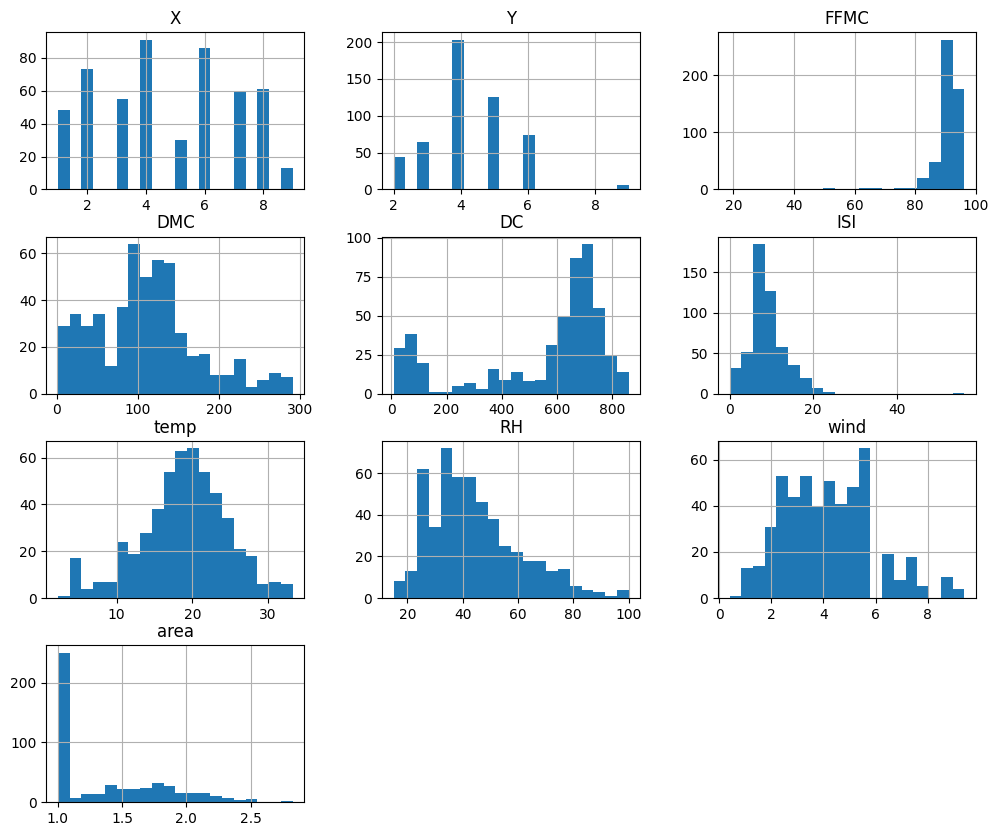

In [136]:
df_sqrt.hist(figsize=(12,10), bins=20)

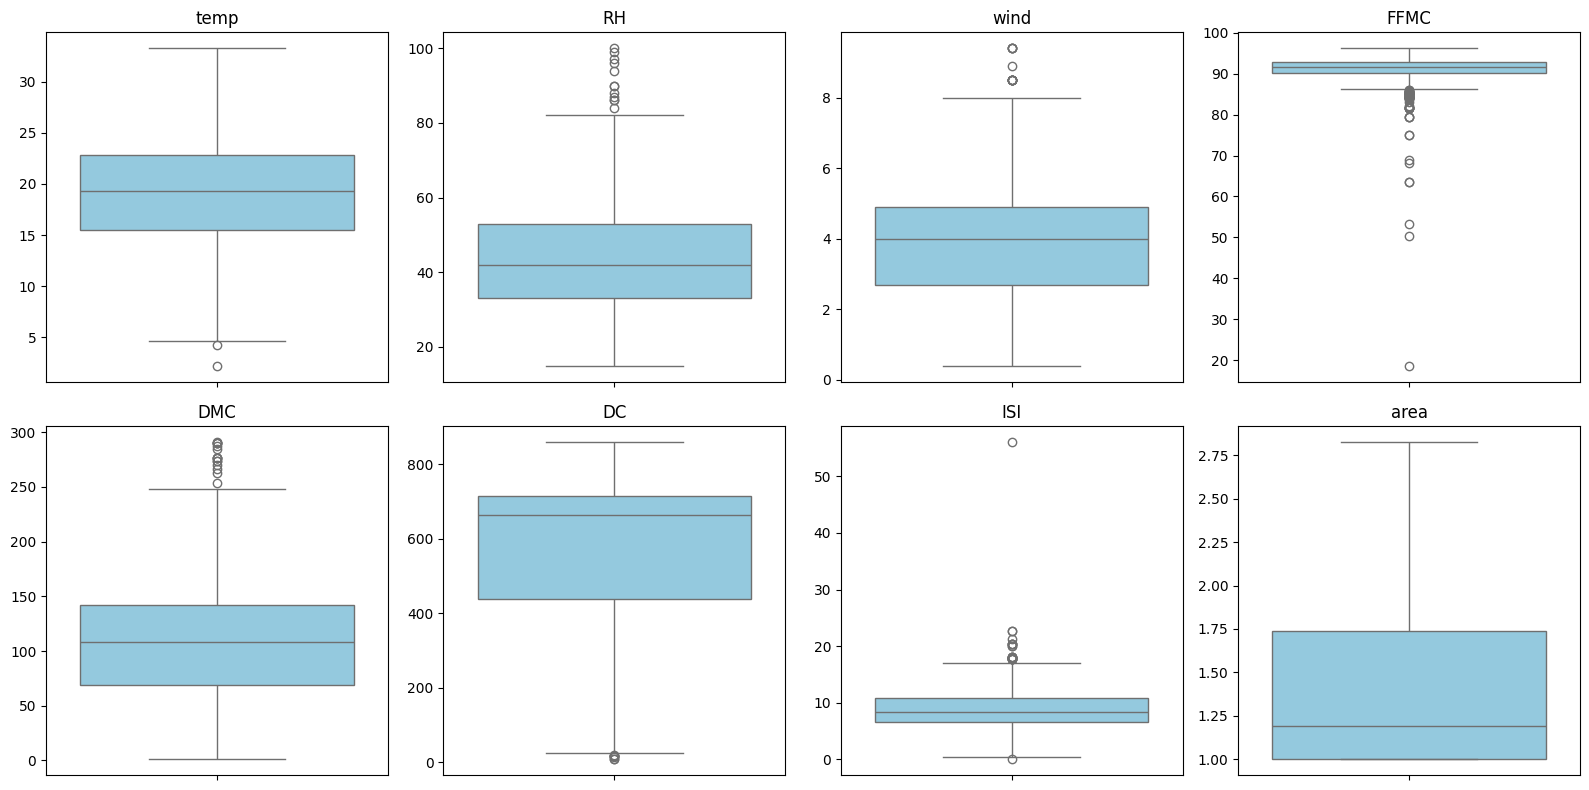

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['temp','RH','wind','FFMC','DMC','DC','ISI','area']

# Crée la grille de subplots (2 lignes, 4 colonnes ici)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

# Aplatir les axes pour pouvoir les parcourir facilement
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')  # optionnel
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


In [138]:
months = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
          'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
days = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}

df['month'] = df['month'].map(months)
df['day'] = df['day'].map(days)

In [139]:
#Removing Outliers
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]
df_numeric = df.select_dtypes(include=[np.number])

X_clean = remove_outliers_iqr(df_numeric)

print("Avant :", X_clean.shape)
print("Après :", X_clean.shape)
print(X_clean)

Avant : (321, 12)
Après : (321, 12)
     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind      area
1    7  4     10    2  90.6   35.4  669.1   6.7  18.0  33   0.9  1.000000
2    7  4     10    6  90.6   43.7  686.9   6.7  14.6  33   1.3  1.000000
5    8  6      8    7  92.3   85.3  488.0  14.7  22.2  29   5.4  1.000000
6    8  6      8    1  92.3   88.9  495.6   8.5  24.1  27   3.1  1.000000
8    8  6      9    2  91.0  129.5  692.6   7.0  13.1  63   5.4  1.000000
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...       ...
502  4  4      8    2  96.1  181.1  671.2  14.3  20.7  69   4.9  1.000000
507  2  4      8    5  91.0  166.9  752.6   7.1  25.9  41   3.6  1.000000
509  5  4      8    5  91.0  166.9  752.6   7.1  21.1  71   7.6  1.467560
510  6  5      8    5  91.0  166.9  752.6   7.1  18.2  62   5.4  1.165193
515  1  4      8    6  94.4  146.0  614.7  11.3  25.6  42   4.0  1.000000

[321 rows x 12 columns]


RobustScaler réduit leur influence pendant la normalisation en utilisant la médiane et l’IQR au lieu de la moyenne et de l’écart-type



In [140]:
from sklearn.preprocessing import RobustScaler


cols = ['temp','RH','wind','FFMC','DMC','DC','ISI','area']
scaler = RobustScaler()
X_scaled_robust = scaler.fit_transform(df[cols])


In [141]:
df_robust = pd.concat([pd.DataFrame(X_scaled_robust, columns=cols), df['day'], df['month'], df['X'], df['Y']], axis=1)

In [145]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,1.000000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,1.000000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,1.000000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,1.000000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,1.734033
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,2.238882
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,1.870335
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,1.000000


In [147]:
df_robust

,temp,RH,wind,FFMC,DMC,DC,ISI,area,day,month,X,Y
0,-1.520548,0.45,1.227273,-2.000000,-1.112466,-2.063360,-0.767442,-0.258580,5,3,7,5
1,-0.178082,-0.45,-1.409091,-0.370370,-0.987805,0.017741,-0.395349,-0.258580,2,10,7,4
2,-0.643836,-0.45,-1.227273,-0.370370,-0.875339,0.082187,-0.395349,-0.258580,6,10,7,4
3,-1.506849,2.75,0.000000,0.037037,-1.016260,-2.124185,0.139535,-0.258580,5,3,8,6
4,-1.082192,2.85,-1.000000,-0.851852,-0.772358,-2.034757,0.279070,-0.258580,7,3,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1.164384,-0.50,-0.590909,-3.703704,-0.699187,0.005069,-1.511628,0.734671,7,8,4,3
513,0.356164,1.45,0.818182,-3.703704,-0.699187,0.005069,-1.511628,1.417803,7,8,2,4
514,0.260274,1.40,1.227273,-3.703704,-0.699187,0.005069,-1.511628,0.919106,7,8,7,4
515,0.863014,0.00,0.000000,1.037037,0.510840,-0.179218,0.674419,-0.258580,6,8,1,4


In [158]:
df, df_robust = df.align(df_robust, join='outer', axis=1)
diff = df.compare(df_robust)

In [164]:
diff_ = df_robust - df
print(diff_)

             DC         DMC       FFMC        ISI     RH  X  Y      area  day  \
0    -96.363360  -27.312466 -88.200000  -5.867442 -50.55  0  0 -1.258580    0   
1   -669.082259  -36.387805 -90.970370  -7.095349 -33.45  0  0 -1.258580    0   
2   -686.817813  -44.575339 -90.970370  -7.095349 -33.45  0  0 -1.258580    0   
3    -79.624185  -34.316260 -91.662963  -8.860465 -94.25  0  0 -1.258580    0   
4   -104.234757  -52.072358 -90.151852  -9.320930 -96.15  0  0 -1.258580    0   
..          ...         ...        ...        ...    ... .. ..       ...  ...   
512 -665.594931  -57.399187 -85.303704  -3.411628 -32.50  0  0 -0.999362    0   
513 -665.594931  -57.399187 -85.303704  -3.411628 -69.55  0  0 -0.821079    0   
514 -665.594931  -57.399187 -85.303704  -3.411628 -68.60  0  0 -0.951229    0   
515 -614.879218 -145.489160 -93.362963 -10.625581 -42.00  0  0 -1.258580    0   
516 -108.718465   -4.426829 -83.981481  -2.797674 -31.55  0  0 -1.258580    0   

     month       temp      

In [161]:
df_robust['Y']

,Y
0,5
1,4
2,4
3,6
4,6
...,...
512,3
513,4
514,4
515,4


In [159]:
print(diff)

        DC              DMC            FFMC             ISI             RH  \
      self     other   self     other  self     other  self     other self   
0     94.3 -2.063360   26.2 -1.112466  86.2 -2.000000   5.1 -0.767442   51   
1    669.1  0.017741   35.4 -0.987805  90.6 -0.370370   6.7 -0.395349   33   
2    686.9  0.082187   43.7 -0.875339  90.6 -0.370370   6.7 -0.395349   33   
3     77.5 -2.124185   33.3 -1.016260  91.7  0.037037   9.0  0.139535   97   
4    102.2 -2.034757   51.3 -0.772358  89.3 -0.851852   9.6  0.279070   99   
..     ...       ...    ...       ...   ...       ...   ...       ...  ...   
512  665.6  0.005069   56.7 -0.699187  81.6 -3.703704   1.9 -1.511628   32   
513  665.6  0.005069   56.7 -0.699187  81.6 -3.703704   1.9 -1.511628   71   
514  665.6  0.005069   56.7 -0.699187  81.6 -3.703704   1.9 -1.511628   70   
515  614.7 -0.179218  146.0  0.510840  94.4  1.037037  11.3  0.674419   42   
516  106.7 -2.018465    3.0 -1.426829  79.5 -4.481481   1.1 -1.6

This method will sadly drop 40% of the data

In [166]:
# Calcul des percentiles
lower = df_robust['Y'].quantile(0.1)
upper = df_robust['Y'].quantile(0.9)

# Winsorisation
df_robust['Y'] = df_robust['Y'].clip(lower, upper)


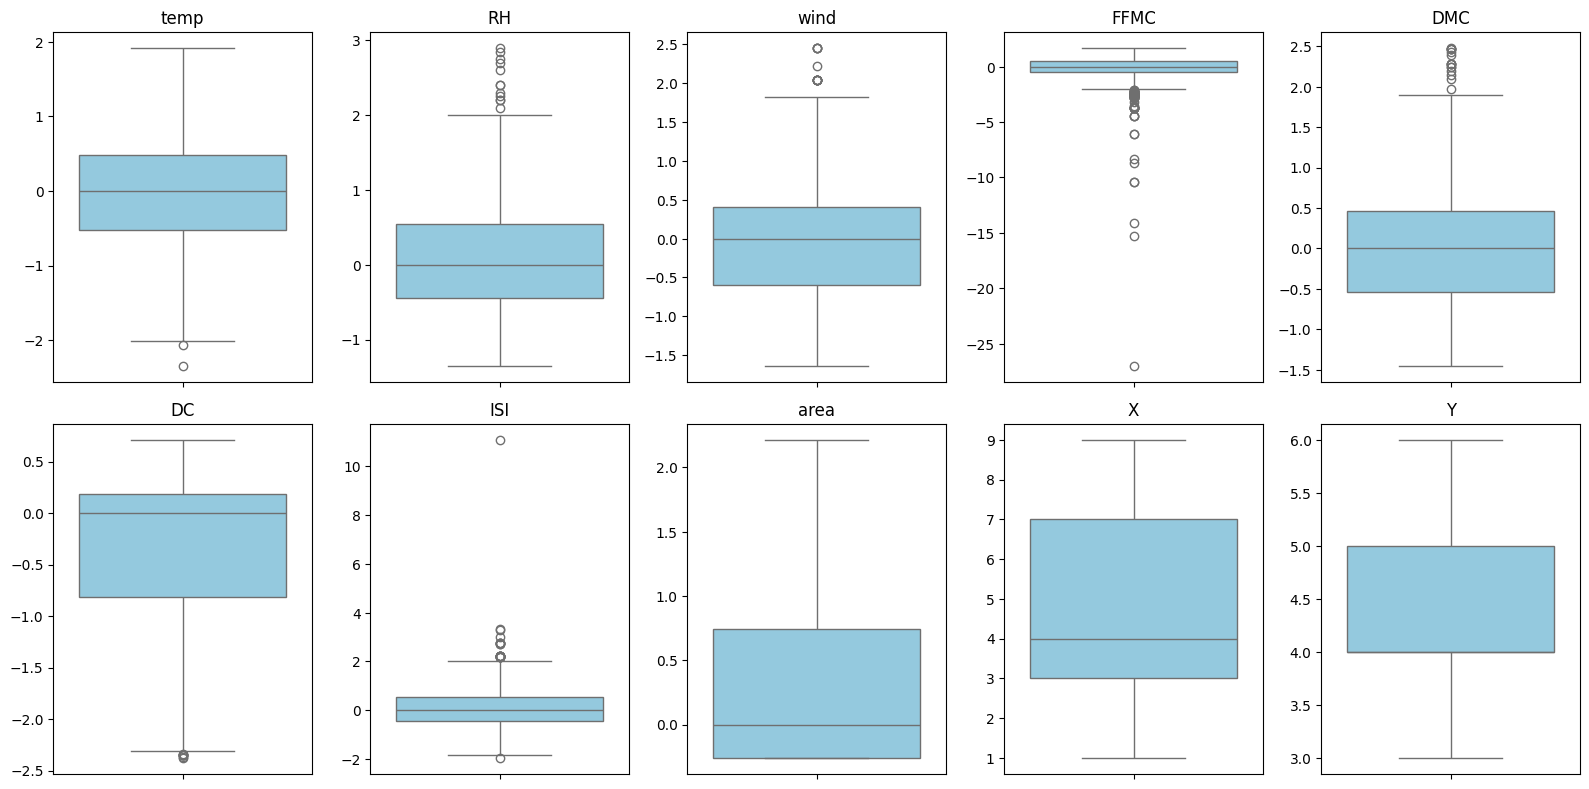

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['temp','RH','wind','FFMC','DMC','DC','ISI','area','X','Y']

# Crée la grille de subplots (2 lignes, 4 colonnes ici)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,8))

# Aplatir les axes pour pouvoir les parcourir facilement
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df_robust, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')  # optionnel
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


calcul de correlation

avec pearson

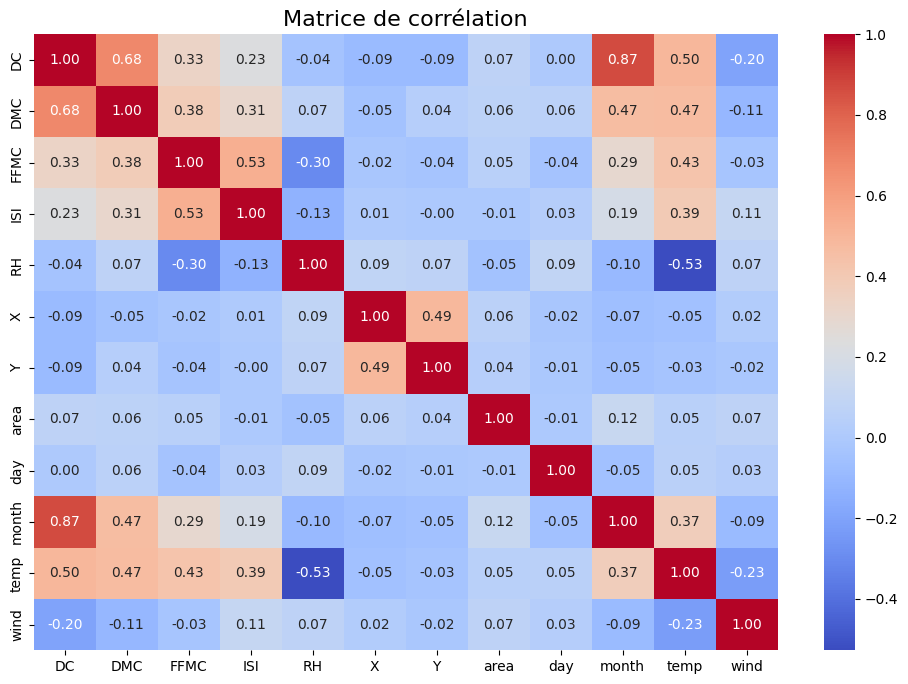

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_robust = df_robust.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_robust, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation", fontsize=16)
plt.show()


avec spearmanr

In [173]:
from scipy.stats import spearmanr, kendalltau

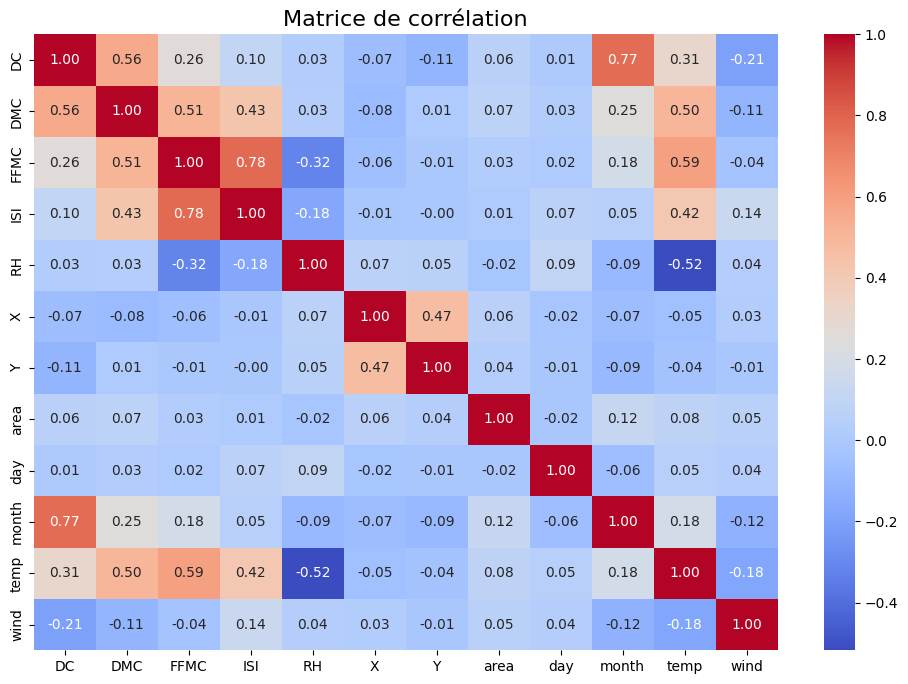

In [175]:
spearman_corr_matrix = df_robust.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation", fontsize=16)
plt.show()


In [ ]:
# Calcul de Spearman entre deux colonnes spécifiques
rho, pval = spearmanr(df_robust['X'], df['Y'])
print(f"\nSpearman correlation entre X et Y : {rho:.3f}, p-value = {pval:.3f}")

avec Kendall

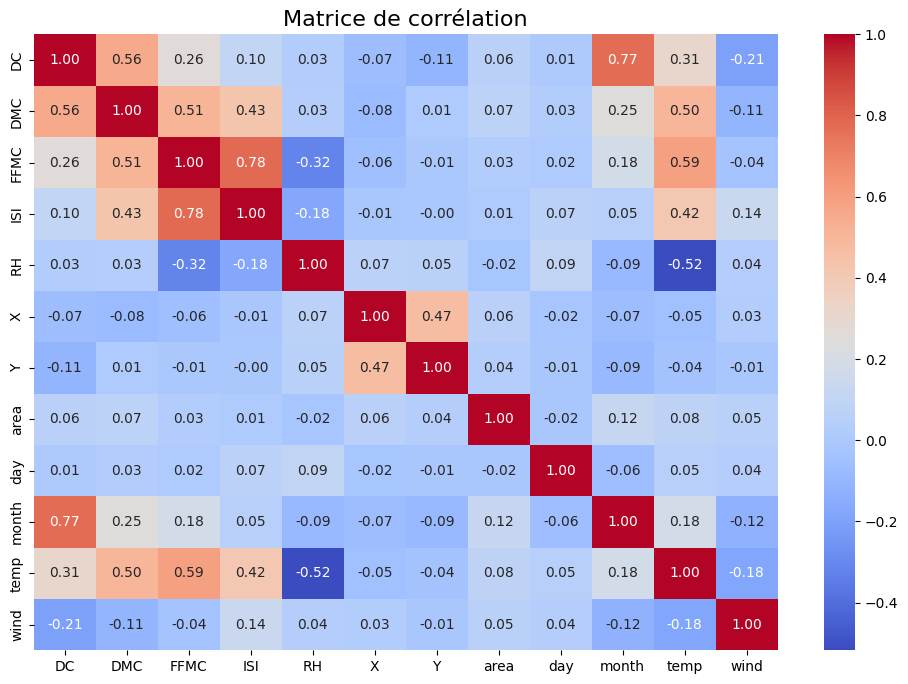

In [176]:
kendall_corr_matrix = df_robust.corr(method='kendall')
kendall_corr_matrix = df_robust.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation", fontsize=16)
plt.show()


Application de PCA pour régler le problème de corrélation

In [177]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = df_robust  # ou df_scaled.values

pca = PCA()  # par défaut, garde toutes les composantes
X_pca = pca.fit_transform(X)


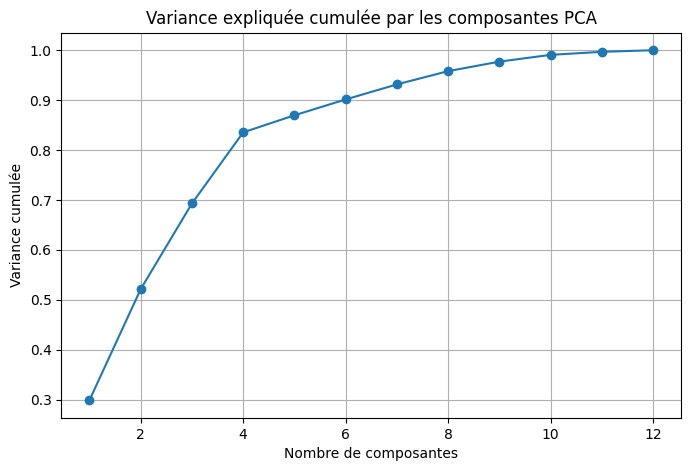

✅ Nombre optimal de composantes pour 80% de variance : 4


In [184]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.title("Variance expliquée cumulée par les composantes PCA")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée")
plt.grid(True)
plt.show()

# Tu peux choisir le nombre de composantes pour atteindre ~80% de variance
n_comp = np.argmax(cum_var >= 0.80) + 1
print(f"✅ Nombre optimal de composantes pour 80% de variance : {n_comp}")

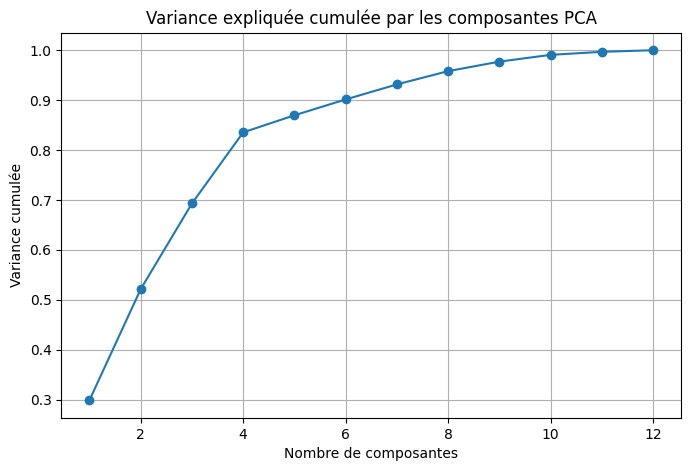

✅ Nombre optimal de composantes pour 0% de variance : 6


In [185]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.title("Variance expliquée cumulée par les composantes PCA")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée")
plt.grid(True)
plt.show()

# Tu peux choisir le nombre de composantes pour atteindre ~80% de variance
n_comp = np.argmax(cum_var >= 0.90) + 1
print(f"✅ Nombre optimal de composantes pour 0% de variance : {n_comp}")

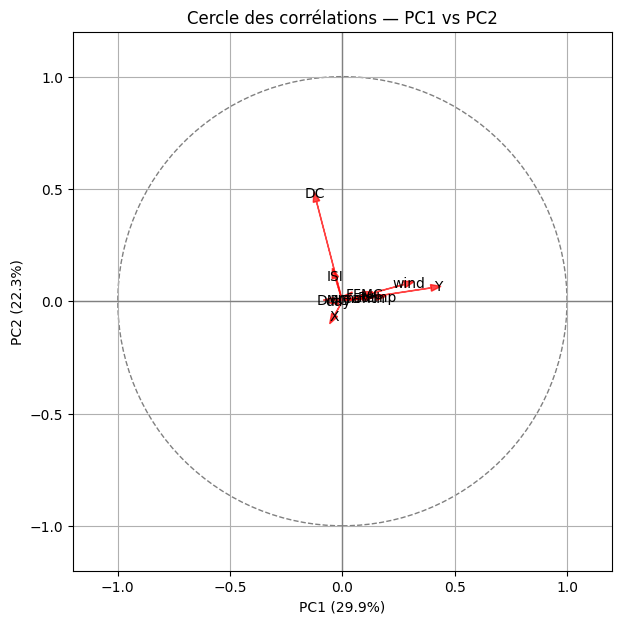

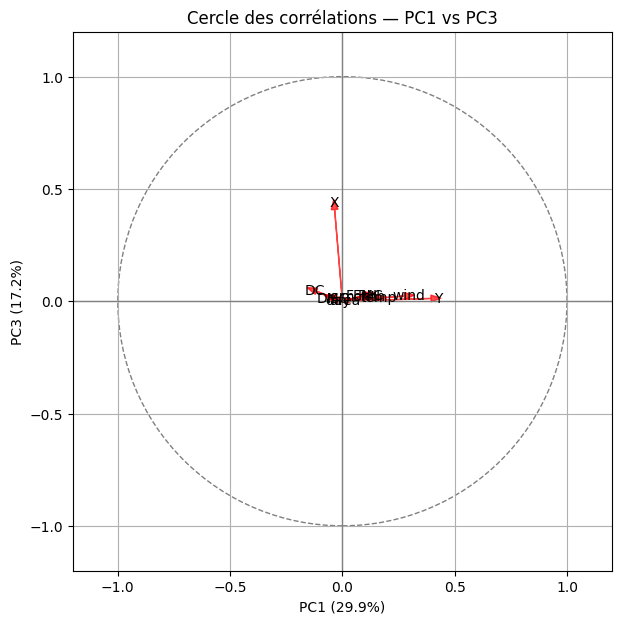

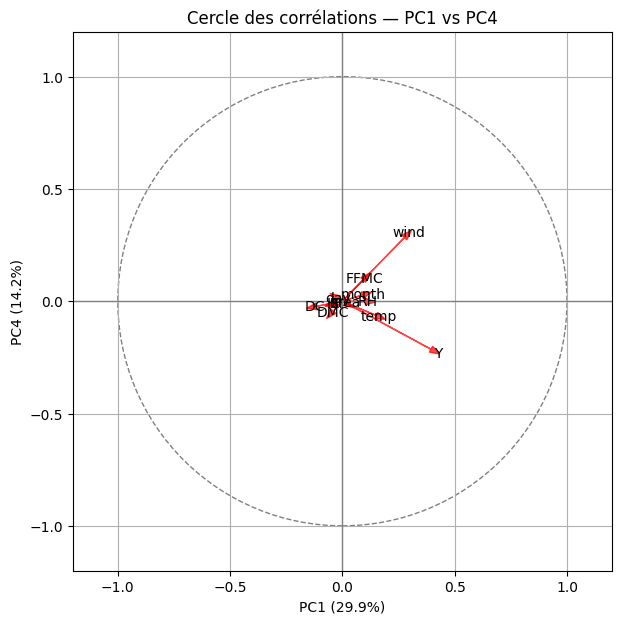

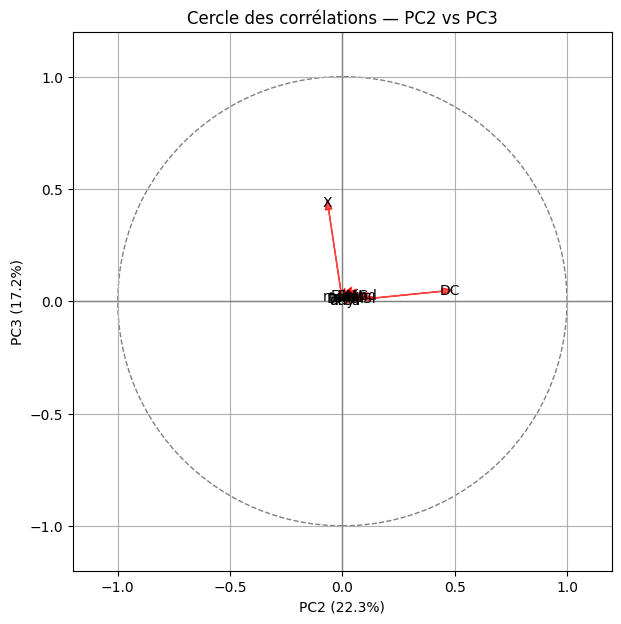

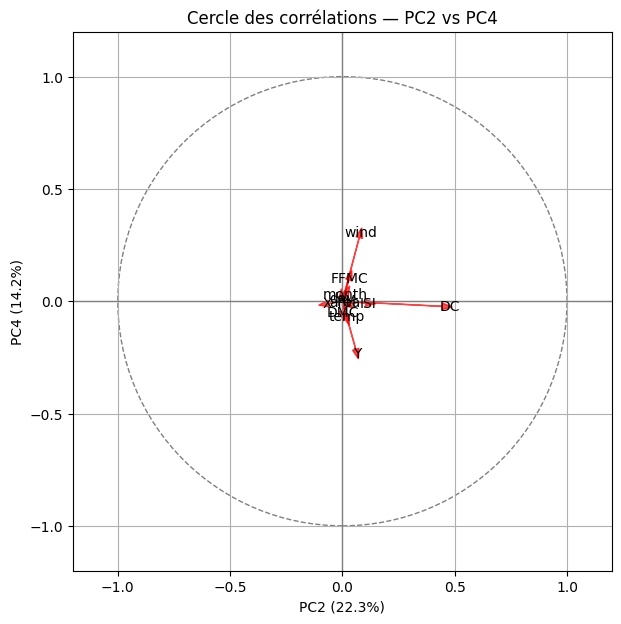

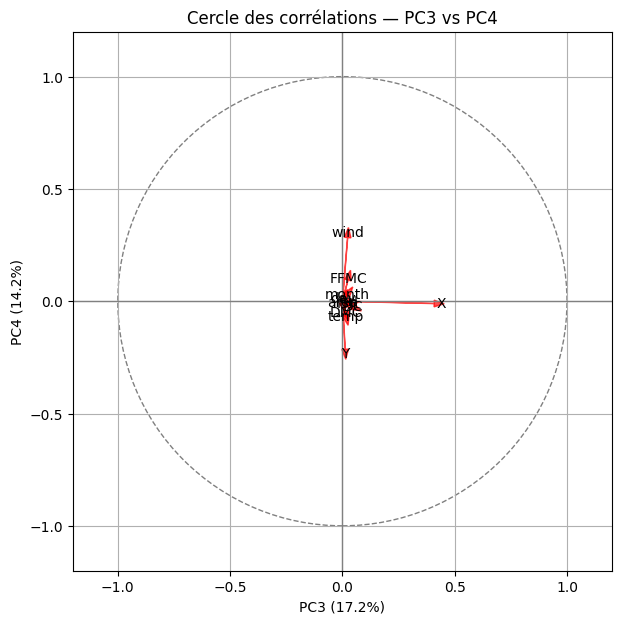

In [204]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ✅ PCA déjà effectuée
pca_final_4 = PCA(n_components=4)
X_pca_final_4 = pca_final_4.fit_transform(X)

# ✅ Variables
features = ['temp','RH','wind','FFMC','DMC','DC','ISI','area','X','Y','month','day']

# ✅ Corrélations entre variables et composantes principales
corvar = pca_final_4.components_.T * np.sqrt(pca_final_4.explained_variance_ratio_)

# ✅ Fonction d’affichage
def plot_correlation_circle(corvar, features, pca, ax1=0, ax2=1, radius=1):
    fig, ax = plt.subplots(figsize=(7,7))

    # cercle unité
    circle = plt.Circle((0,0), radius, color='grey', fill=False, linestyle='--')
    ax.add_artist(circle)

    # flèches (vecteurs)
    for i, (x, y) in enumerate(zip(corvar[:, ax1], corvar[:, ax2])):
        ax.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.03)
        ax.text(x*1.08, y*1.08, features[i], color='black',
                ha='center', va='center', fontsize=10)

    # axes et style
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.set_xlabel(f"PC{ax1+1} ({pca.explained_variance_ratio_[ax1]*100:.1f}%)")
    ax.set_ylabel(f"PC{ax2+1} ({pca.explained_variance_ratio_[ax2]*100:.1f}%)")
    ax.set_title(f"Cercle des corrélations — PC{ax1+1} vs PC{ax2+1}")
    ax.set_xlim(-radius*1.2, radius*1.2)
    ax.set_ylim(-radius*1.2, radius*1.2)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    plt.show()

# ✅ Boucle automatique sur les combinaisons d’axes (PC1–PC2, PC1–PC3, etc.)
pairs = list(itertools.combinations(range(pca_final_4.n_components), 2))

for (i, j) in pairs:
    plot_correlation_circle(corvar, features, pca_final_4, ax1=i, ax2=j)


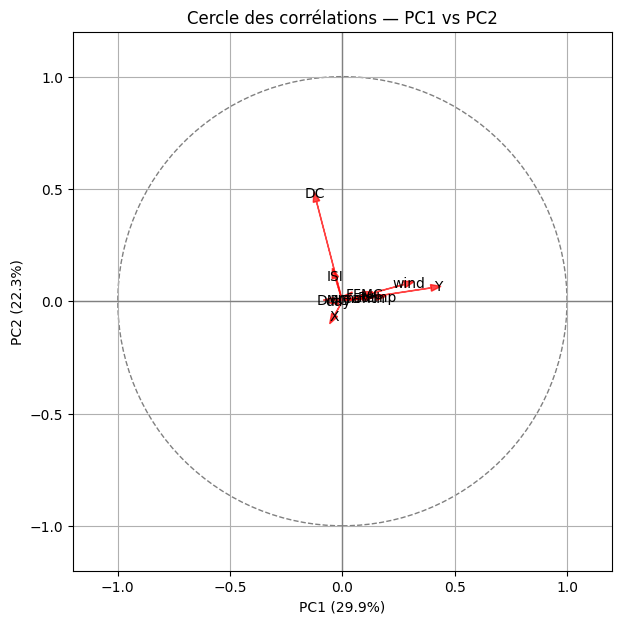

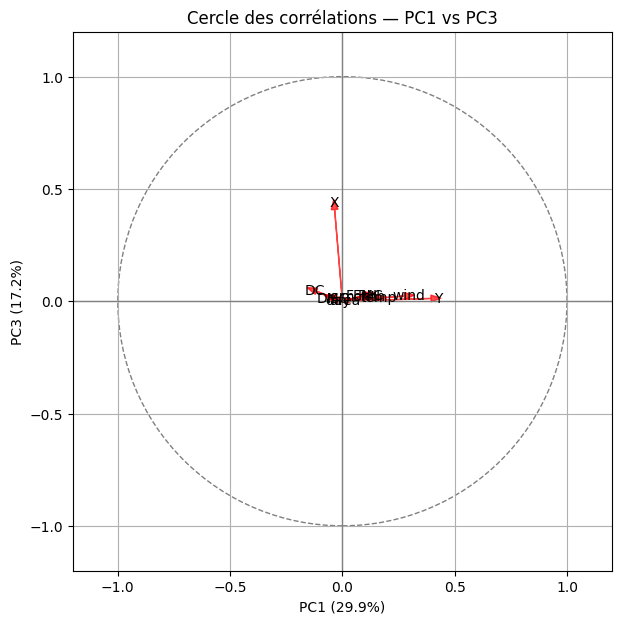

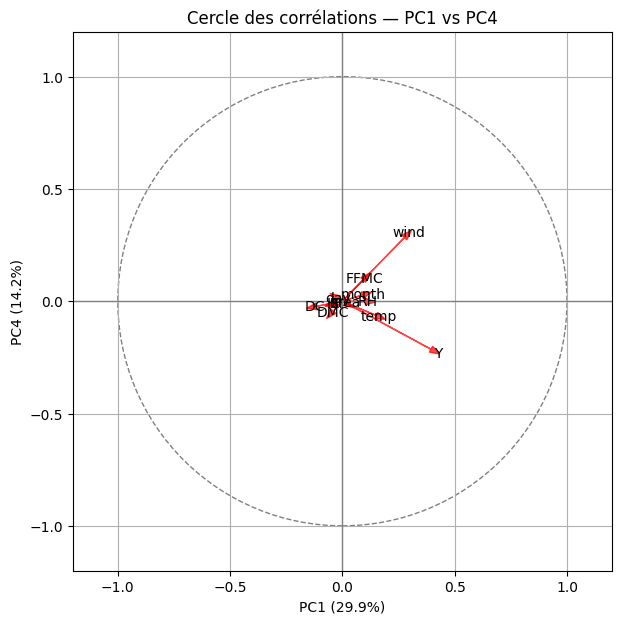

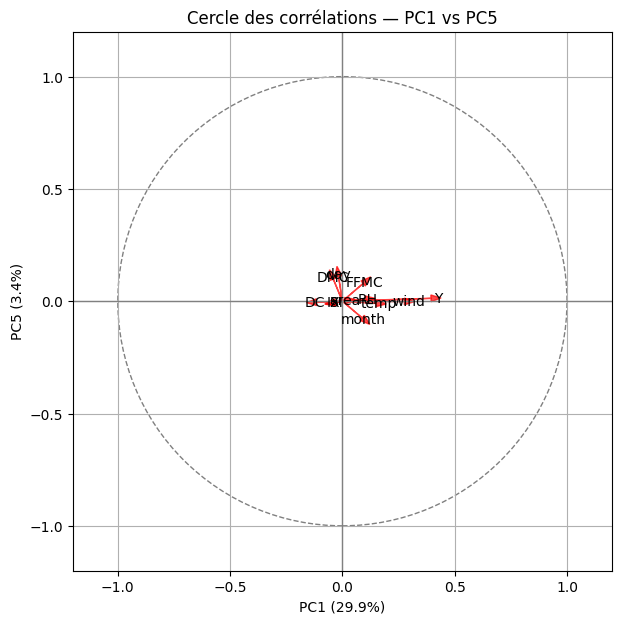

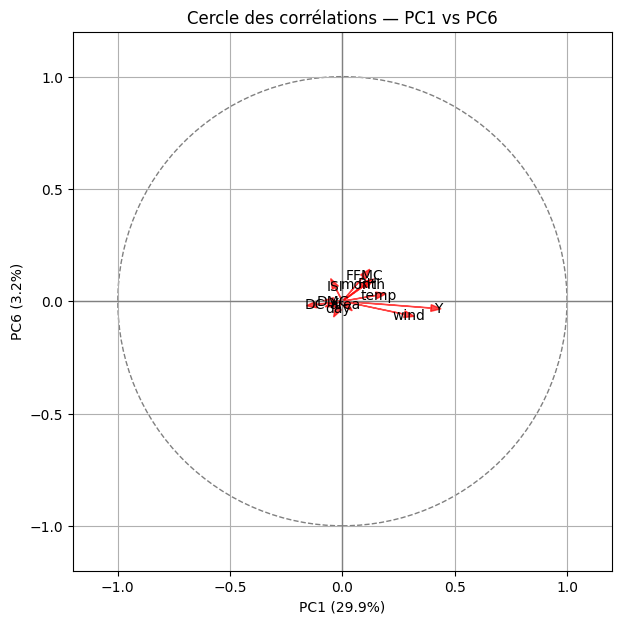

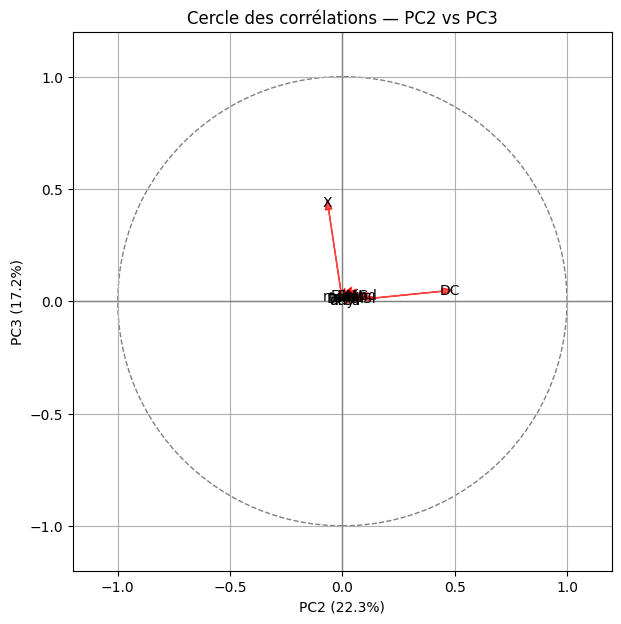

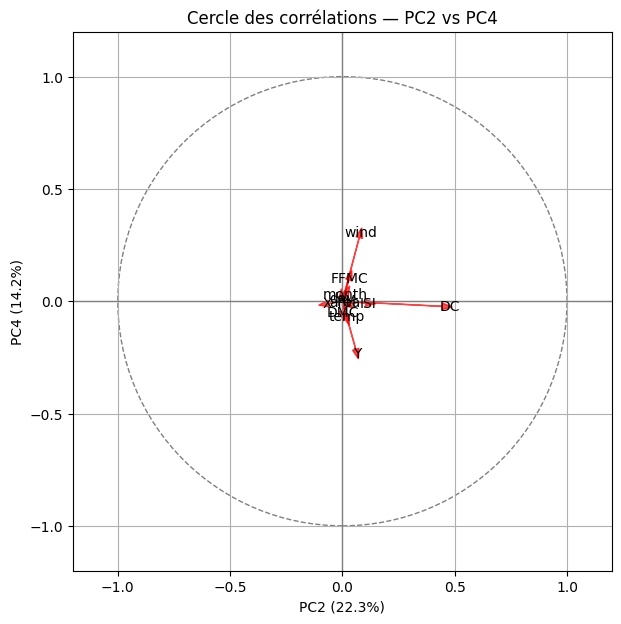

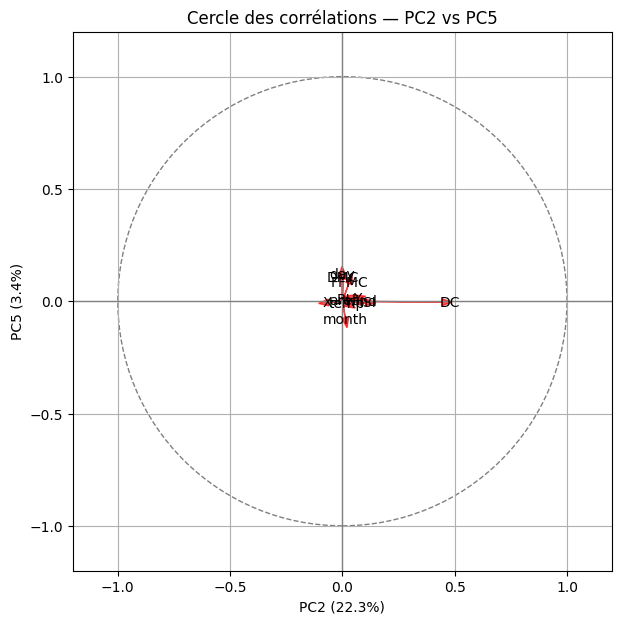

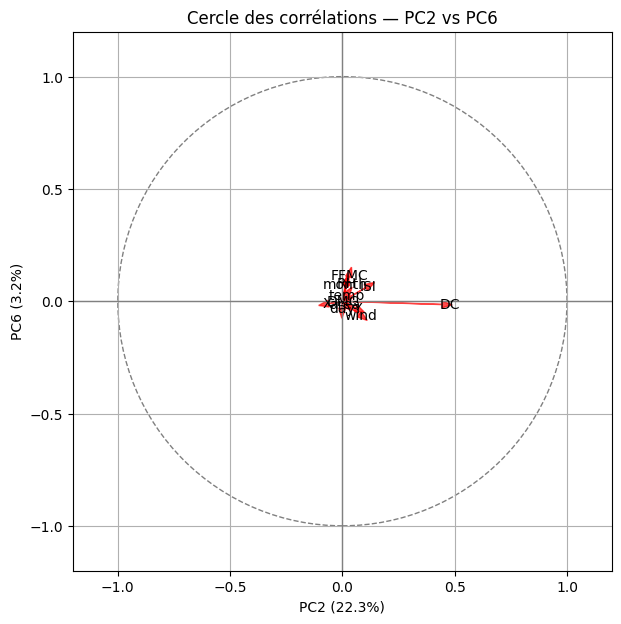

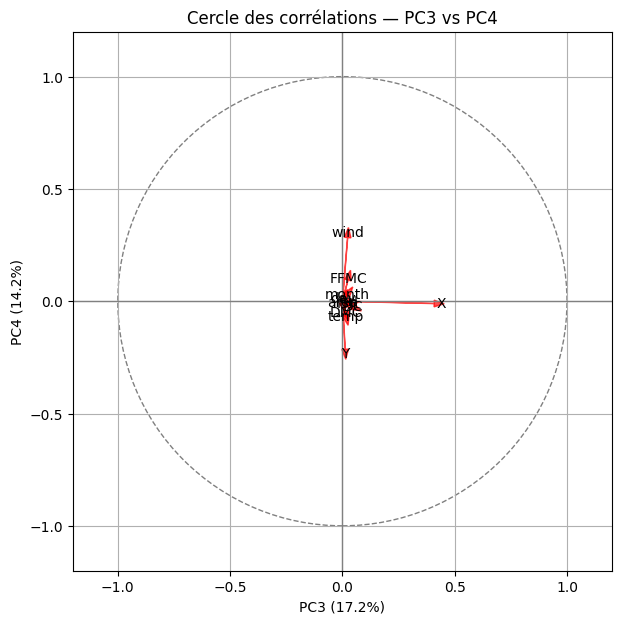

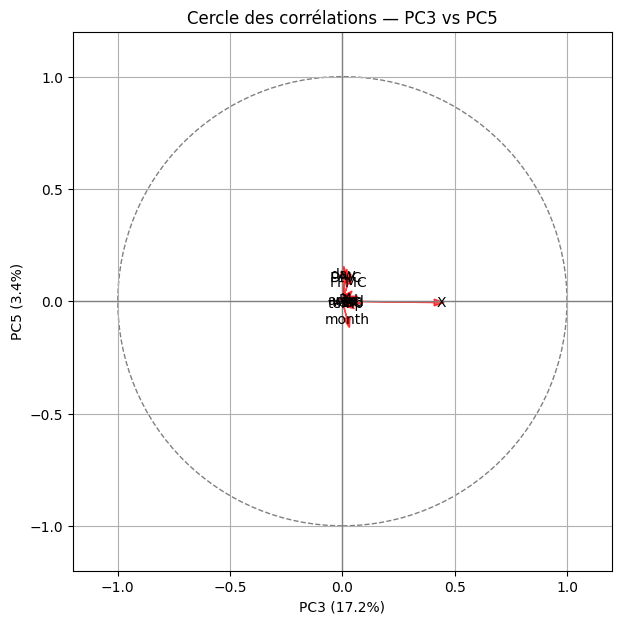

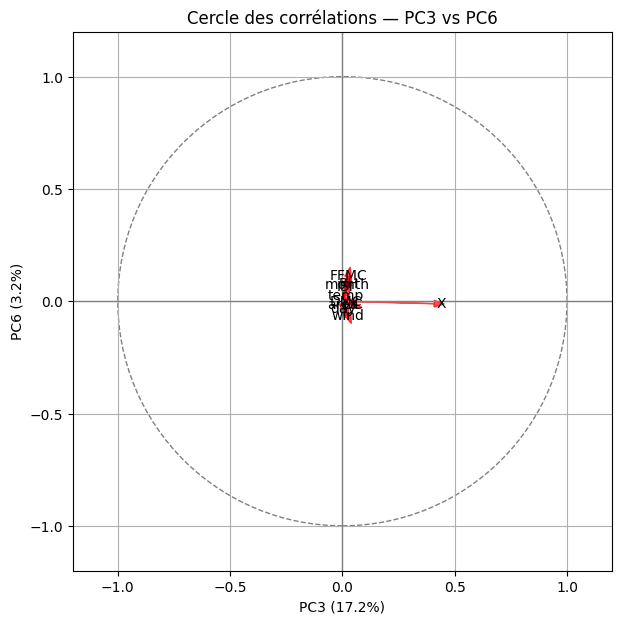

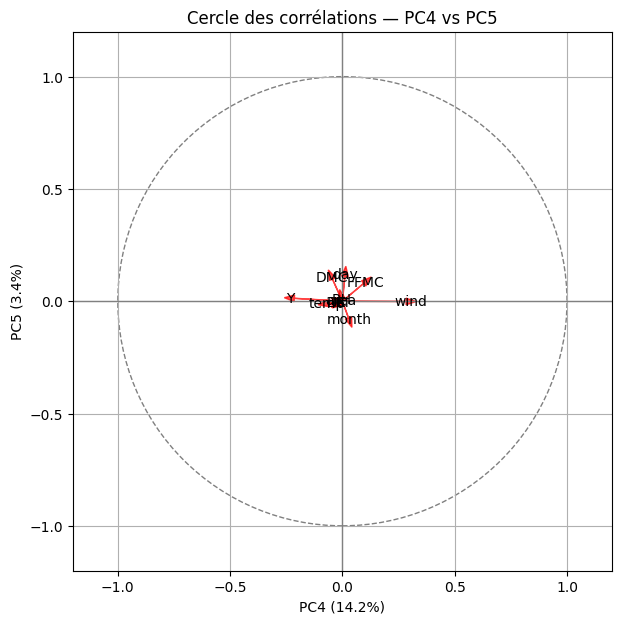

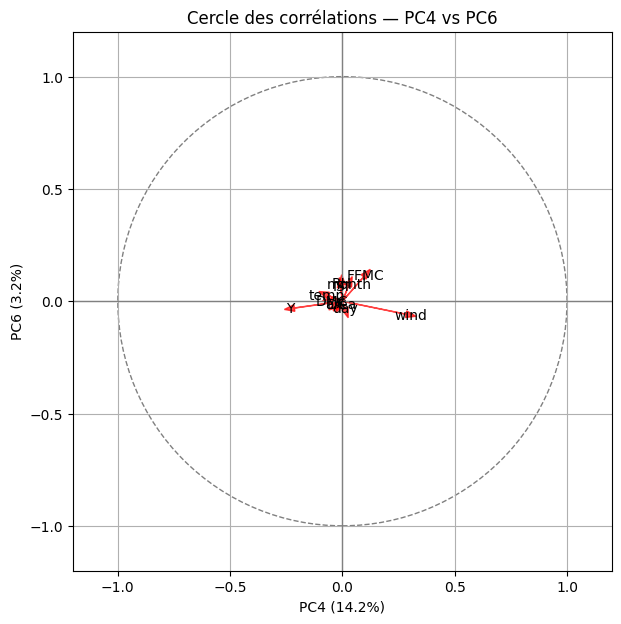

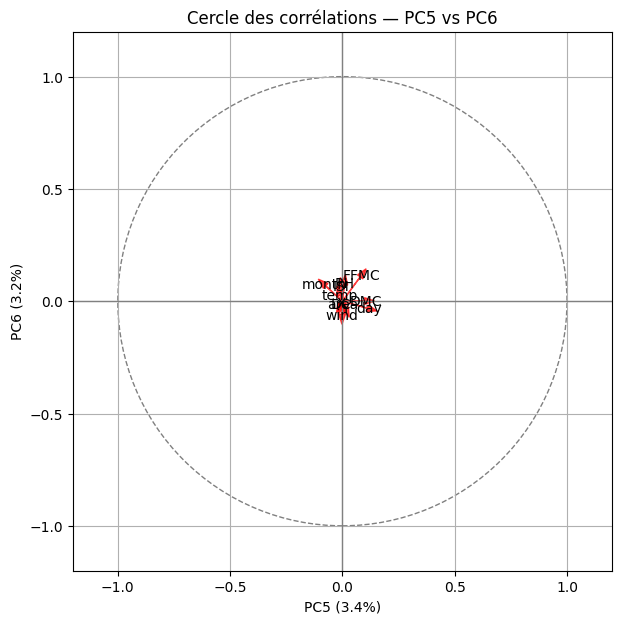

In [205]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_final_6 = PCA(n_components=6)
X_pca_final_6 = pca_final_6.fit_transform(X)



# ✅ Variables
features = ['temp','RH','wind','FFMC','DMC','DC','ISI','area','X','Y','month','day']

# ✅ Corrélations entre variables et composantes principales
corvar = pca_final_6.components_.T * np.sqrt(pca_final_6.explained_variance_ratio_)

# ✅ Boucle automatique sur les combinaisons d’axes (PC1–PC2, PC1–PC3, etc.)
pairs = list(itertools.combinations(range(pca_final_6.n_components), 2))

for (i, j) in pairs:
    plot_correlation_circle(corvar, features, pca_final_6, ax1=i, ax2=j)


Choix d'algorithme et le nombre K